# Plots for Multivariate and High-Dimensional Data
> Consider the vectors of observations, $(x_{11},\cdots,x_{1p}), \cdots, (x_{n1}, \cdots, x_{np})$, where $n$ is the number of observations and $p$ is the number of variables, or features. In cases where $p$ is large the data is called ***high dimensional***.

## Scatter Plot Matrix
- The basic ***scatter plot*** is very common in data visualization. In its simplest form, when considering pairs of observations $(x_{1}, y_{1}),\cdots, (x_{n},y_{n})$ it is a plot of these coordinates on the ***Cartesian plain***. 
- When moving from pairs to higher dimensions, each observation is represented as the vector or tuple $(x_{i1}, \cdots, x_{ip})$. If $p=3$ one may still try to illustrate a ***point cloud***, however for higher dimensions this isn't possible. In this case, one of the most popular plots for visualizing relationships is the ***scatter plot matrix***. It consist of taking each possible pair of variables and plotting a scatter variables, there are $p^{2}$ total plots, where $p$ of the plots are redundant because they plot a vairable aginst itself, and the other $p^{2}-p$ plots each contain a duplicate of plots. Hence, for example, if $p=4$, there are $(p^{2}-p)/2=6$ important plots in the scatter plot matrix even though the $4\times4$ matrix has $16$ plots in total.
- Plot in Julia

Number of rows: 150
Names of features:
	["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
Frequency per species:
	["setosa" => 50, "versicolor" => 50, "virginica" => 50]


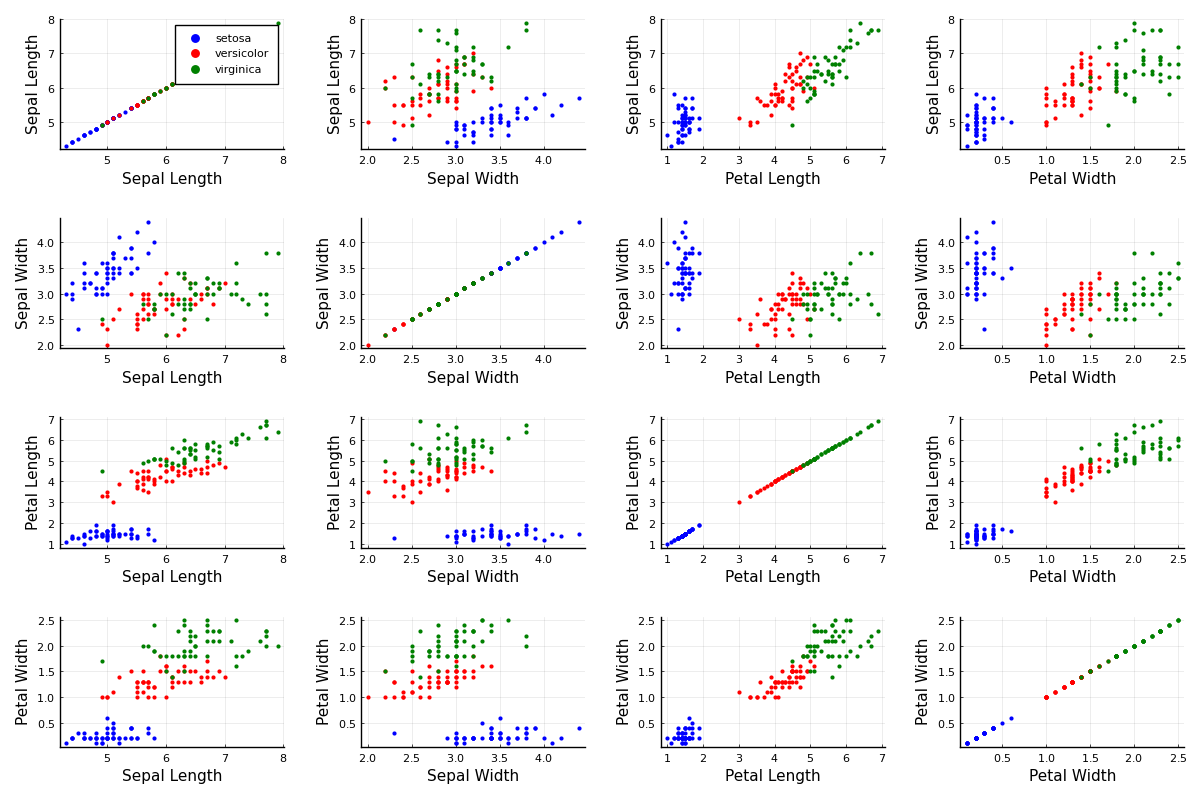

In [2]:
using RDatasets, Plots, Measures; pyplot()

data = dataset("datasets", "iris")
println("Number of rows: ", nrow(data))

insertSpace(name) = begin
    i = findlast(isuppercase, name)
    name[1:i-1] * " " * name[i:end]
end

featureNames = insertSpace.(string.(names(data)))[1:4]
println("Names of features:\n\t", featureNames)

speciesNames = unique(data.Species)
speciesFreqs = [sn => sum(data.Species .== sn) for sn in speciesNames]
println("Frequency per species:\n\t",speciesFreqs)

default(msw=0, ms=3)

scatters = [
    scatter(data[:,i], data[:,j], c=[:blue :red :green], group=data.Species,
        xlabel=featureNames[i], ylabel=featureNames[j], legend = i==1 && j==1)
    for i in 1:4, j in 1:4]

plot(scatters..., size=(1200,800), margin=4mm)

## Heat Map with Marginals
- The ***heat map*** consists of a grid of shaded cells. Another name for it is a ***matrix plot***. The colors of the cells indicate the magnitude, where typically, the "warmer" the color, the higher the value.
- In cases of pairs of observations $(x_{1},y_{1}),\cdots,(x_{n},y_{n})$, the bivariate data can be constructed into a ***bivariate histogram*** in a manner similar to the histogram. In the bivariate case, we partition the Cartesian plain $\mathbb{R}^{2}$, into a grid of bins $\mathcal{B}_{ij}$ for $i=1,\cdots,L_{1}$ and $j=1,\cdots,L_{2}$. Then we count the frequency of observations per bin via
$$
f_{ij} = \frac{1}{n}\sum_{k=1}^{n}\pmb{1}\{x_{k} \in \mathcal{B}_{ij}\},\quad \text{for }i = 1,\cdots,L_{1},\ \ j = 1,\cdots,L_{2}.
$$
- Plot in Julia
  - `marginalhist()` from `StatsPlots`

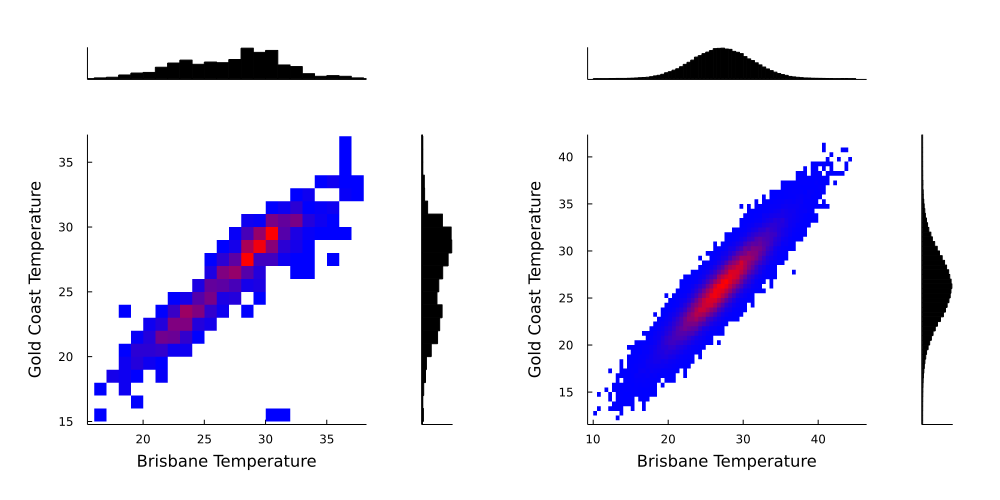

In [3]:
using StatsPlots, Distributions, CSV, DataFrames, Measures; gr()

realData = CSV.read("../data/temperatures.csv", DataFrame)

N = 10^5
include("../data/mvParams.jl")
biNormal = MvNormal(meanVect, covMat)
syntheticData = DataFrame(Matrix{Float64}(rand(MvNormal(meanVect, covMat),N)'), :auto)
rename!(syntheticData, [:x1 => :Brisbane, :x2 => :GoldCoast])

default(c = cgrad([:blue,:red]),
    xlabel="Brisbane Temperature",
    ylabel="Gold Coast Temperature")

p1 = marginalhist(realData.Brisbane, realData.GoldCoast, bins=10:45)
p2 = marginalhist(syntheticData.Brisbane, syntheticData.GoldCoast, bins=10:0.5:45)

plot(p1, p2, size=(1000,500), margin=10mm)

In [4]:
default(xlabel="",
ylabel="")

## Andrews Plot
- The idea is to represent a data vector $(x_{i1},\cdots, x_{ip})$ via a real-valued function. For any individual vector, such a transformation cannot be generally useful, when comparing groups of vectors, it may yield a way to visualize structural different in the data.
- The specific transformation rule that we present here creates a plot known as ***Andrews plot***. Here, for the $i$'th data vector $(x_{i1},\cdots,x_{ip})$, we create the function $f_{i}(\cdot)$ defined on $[-\pi,\pi]$ via,
$$
f_{i}(t) = \frac{x_{i1}}{\sqrt{2}} + x_{i2}\sin(t) + x_{i3}\cos(t) + x_{i4}\sin(2t) + x_{i5}\cos(2t) + x_{i6}\sin(3t) + x_{i7}\sin(3t) +\cdots,
$$
  - with the last term involving a $\sin(\cdot)$ if $p$ is even and a $\cos(\cdot)$ if $p$ is odd. The for $i=1,\cdots,n$, the functions $f_{1}(\cdot),\cdots, f_{n}(\cdot)$ are plotted.
- Plot in Julia

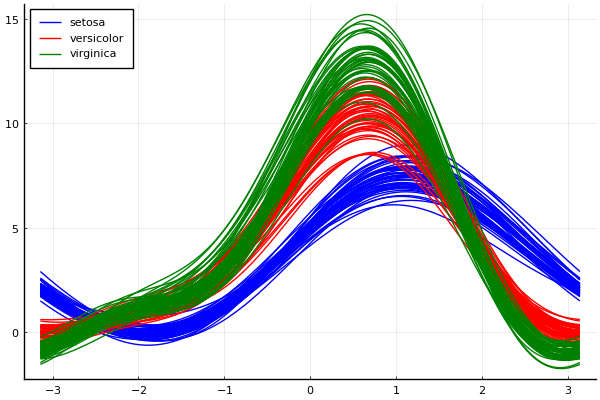

In [5]:
using RDatasets, StatsPlots; pyplot()

iris = dataset("datasets", "iris")
@df iris andrewsplot(:Species, cols(1:4),
    line=(fill=[:blue :red :green]), legend=:topleft)

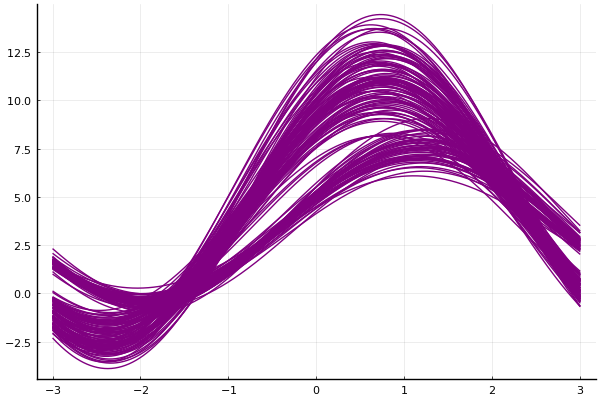

In [6]:
using RDatasets, StatsPlots; pyplot()

iris = dataset("datasets", "iris")

f(x,t) = sum(x[1]/sqrt(2)) + x[2]*sin(t) + x[3]*cos(t) + x[4]*sin(t)
f2(t) = f.(eachrow(iris[:,1:4]),t)
transformation = DataFrame([[eachrow(hcat(f2.(collect(-3:0.01:3))...))...]], :auto)
data = hcat(iris, transformation)
@df data plot(collect(-3:0.01:3),:x1, legend=:none)
